In [1]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from geopy import distance
import math
import re

In [7]:
#ds =  xr.open_dataset('/home/anna/annaCode/forecast_notebooks/MyWaveWAM800/data/MyWave_wam800_c1SPC00.nc')
OPeNDAP_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/mywavewam800v/MyWave_wam800_c3SPC00.nc'
ds =  xr.open_dataset(OPeNDAP_url)
ds

<xarray.Dataset> Size: 24MB
Dimensions:                  (direction: 36, freq: 36, x: 63, y: 1, time: 73)
Coordinates:
  * direction                (direction) float32 144B 5.0 15.0 ... 345.0 355.0
  * freq                     (freq) float32 144B 0.03452 0.03798 ... 0.9702
  * x                        (x) int32 252B 1 2 3 4 5 6 7 ... 58 59 60 61 62 63
  * y                        (y) int32 4B 1
  * time                     (time) datetime64[ns] 584B 2024-12-16T18:00:00 ....
    latitude                 (y, x) float32 252B ...
    longitude                (y, x) float32 252B ...
Data variables:
    forecast_reference_time  datetime64[ns] 8B ...
    SPEC                     (time, y, x, freq, direction) float32 24MB ...
    Pdir                     (time, y, x) float32 18kB ...
    dd                       (time, y, x) float32 18kB ...
    depth                    (y, x) float64 504B ...
    ff                       (time, y, x) float32 18kB ...
    hs                       (time, y, x) float32 18kB ...
    thq_sea                  (time, y, x) float32 18kB ...
    thq_swell                (time, y, x) float32 18kB ...
    tp                       (time, y, x) float32 18kB ...
Attributes:
    title:                           MyWaveWam 800m Vestlandet
    institution:                     Norwegian Meteorological Institute
    source:                          WAM wave model version cycle 4.7.0
    direction_convention:            A direction of 0 degrees means a wave pr...
    history:                         Tue Dec 17 04:32:51 2024: ncks -A -v for...
    history_of_appended_files:       Tue Dec 17 04:32:51 2024: Appended file ...
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds.latitude

<xarray.DataArray 'latitude' (y: 1, x: 63)> Size: 252B
[63 values with dtype=float32]
Coordinates:
  * x          (x) int32 252B 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63
  * y          (y) int32 4B 1
    latitude   (y, x) float32 252B ...
    longitude  (y, x) float32 252B ...
Attributes:
    long_name:      latitude
    standard_name:  latitude
    units:          degree_north

In [4]:
res = ds.longitude
res.values

array([[4.900017 , 4.8709664, 4.756061 , 4.5999417, 5.028041 , 4.7499037,
        5.249911 , 6.000028 , 5.9829645, 5.9829926, 6.0848284, 5.999957 ,
        5.8799706, 3.0000947, 3.4999049, 3.9999762, 5.0000005, 5.5800543,
        5.580011 , 4.499968 , 4.999955 , 3.9999926, 4.829983 , 5.1199822,
        5.379974 , 4.8199053, 4.819998 , 5.0699997, 4.779997 , 4.629887 ,
        4.89994  , 4.749934 , 4.0000257, 4.499905 , 5.030026 , 3.9999275,
        3.9999926, 4.779981 , 3.9999762, 4.720051 , 3.99996  , 4.6799574,
        4.000058 , 4.74995  , 4.999985 , 5.0000157, 5.8300138, 6.3999443,
        6.7199984, 4.999985 , 6.0000415, 6.849968 , 7.3199587, 7.4699306,
        7.780008 , 7.3000026, 7.6199183, 5.0000916, 6.0000563, 7.4699564,
        4.9998636, 5.999901 , 4.9998937]], dtype=float32)

In [5]:
res = ds.latitude
res.values

array([[60.55699 , 60.643997, 60.717987, 60.769   , 59.139988, 58.850006,
        58.850006, 58.399994, 58.41    , 58.399994, 61.85199 , 58.000004,
        58.329998, 58.499985, 58.5     , 58.499992, 58.499992, 58.499985,
        58.599995, 58.699993, 58.7     , 58.999996, 59.059994, 59.079998,
        59.079998, 59.210007, 59.34999 , 59.35    , 59.499996, 59.550007,
        59.55    , 59.63    , 59.29999 , 59.300007, 59.659992, 59.700005,
        60.199993, 60.419994, 60.499996, 60.82999 , 61.      , 61.      ,
        61.49999 , 61.499996, 61.999992, 62.499992, 62.499992, 62.8     ,
        62.819992, 62.999996, 62.99999 , 62.999996, 63.100002, 63.170006,
        63.179993, 63.249992, 63.250008, 63.299984, 63.29999 , 63.319996,
        63.500004, 63.500004, 63.600006]], dtype=float32)

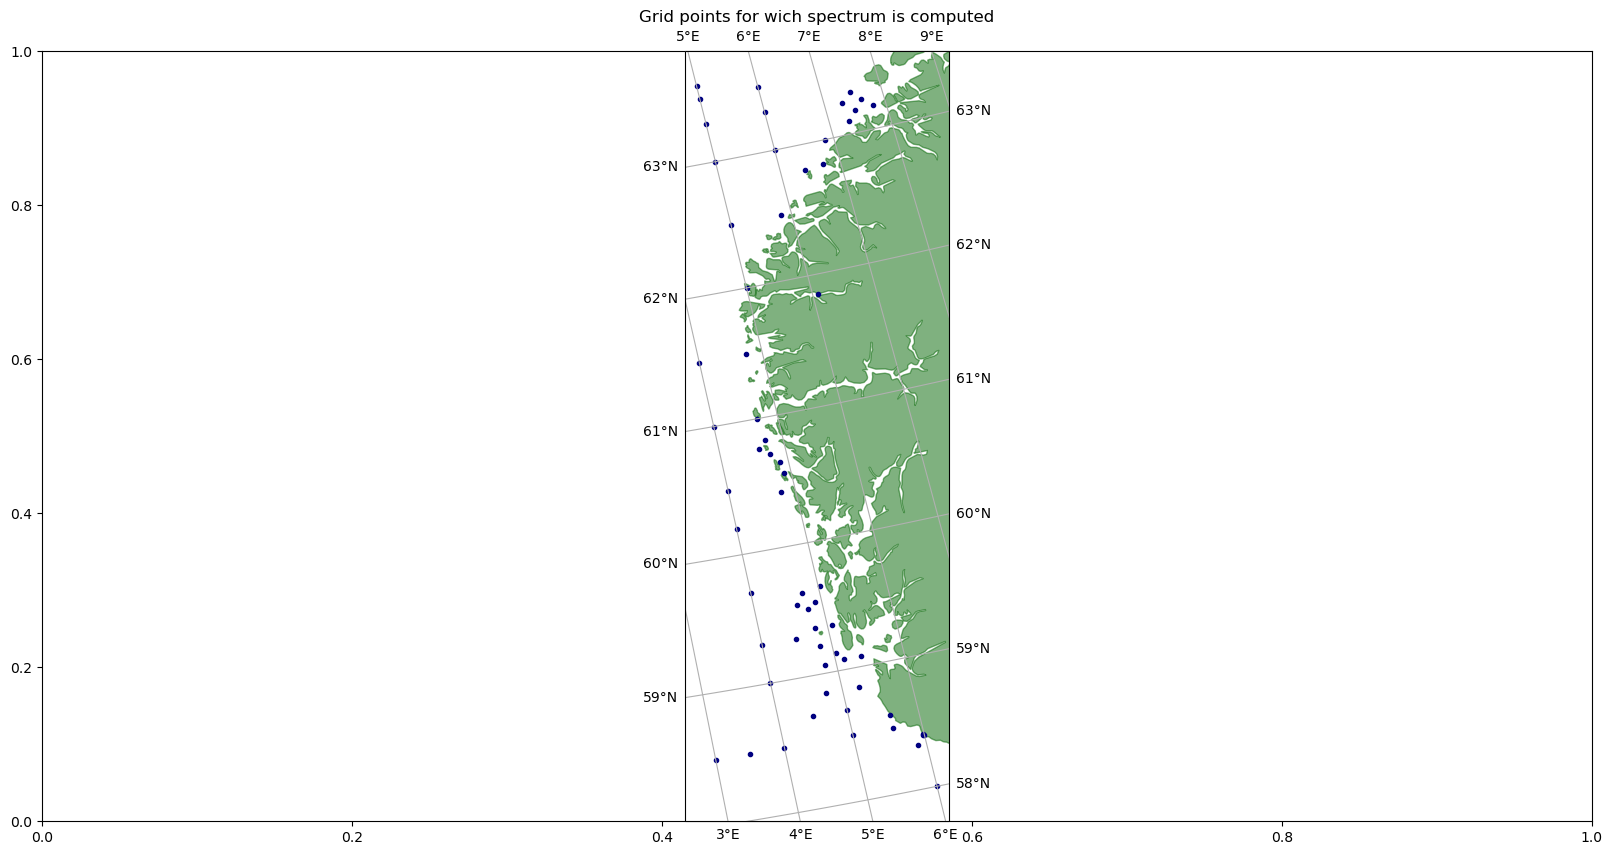

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.add_feature(cfeature.LAND,color='darkgreen', alpha = 0.5)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.set_title("Grid points for wich spectrum is computed")
ax.scatter(ds.longitude,ds.latitude,marker='.', color='navy', transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)